# Lab 06 - UCS

In [1]:
import heapq

# Define the graph with correct weighted edges from the image
graph = {
    'A': [('B', 6), ('C', 9), ('E', 1)],
    'B': [('A', 6), ('D', 3), ('E', 4)],
    'C': [('A', 9), ('F', 2), ('G', 3)],
    'D': [('B', 3), ('E', 5), ('F', 7)],
    'E': [('A', 1), ('B', 4), ('D', 5), ('F', 6)],
    'F': [('C', 2), ('D', 7), ('E', 6)],
    'G': [('C', 3)]
}

# UCS function to find the lowest-cost path
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "C"
goal_node = "B"

# Run UCS and print the shortest cost path
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

if ucs_path:
    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")



UCS Shortest Path: C → F → E → B
Total Cost: 12


# Lab 06 UCS-using networkX


UCS Shortest Path: C → F → E → B
Total Cost: 12


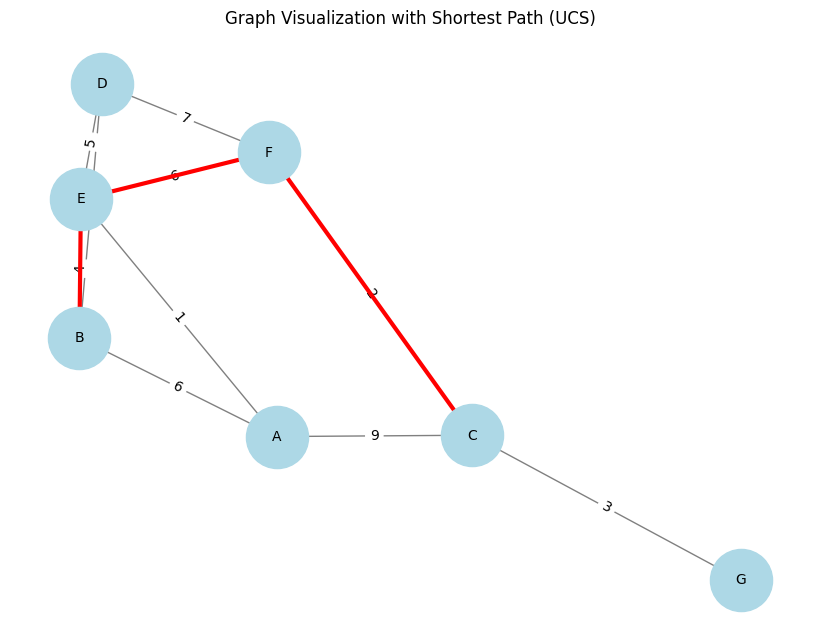

In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph with correct weighted edges from the image
graph = {
    'A': [('B', 6), ('C', 9), ('E', 1)],
    'B': [('A', 6), ('D', 3), ('E', 4)],
    'C': [('A', 9), ('F', 2), ('G', 3)],
    'D': [('B', 3), ('E', 5), ('F', 7)],
    'E': [('A', 1), ('B', 4), ('D', 5), ('F', 6)],
    'F': [('C', 2), ('D', 7), ('E', 6)],
    'G': [('C', 3)]
}

# UCS function to find the lowest-cost path
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "C"
goal_node = "B"

# Run UCS and get the shortest path
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

# Create the graph using NetworkX
G = nx.Graph()

# Add edges with weights
for node, edges in graph.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

# Define node positions for better visualization
pos = nx.spring_layout(G)

# Draw the full graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

# Draw edge labels (weights)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Highlight the UCS path
if ucs_path:
    path_edges = list(zip(ucs_path, ucs_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")

plt.title("Graph Visualization with Shortest Path (UCS)")
plt.show()


# task 3


UCS Shortest Path: Arad → Sibiu → Rimnicu Vilcea → Pitesti → Bucharest
Total Cost: 418


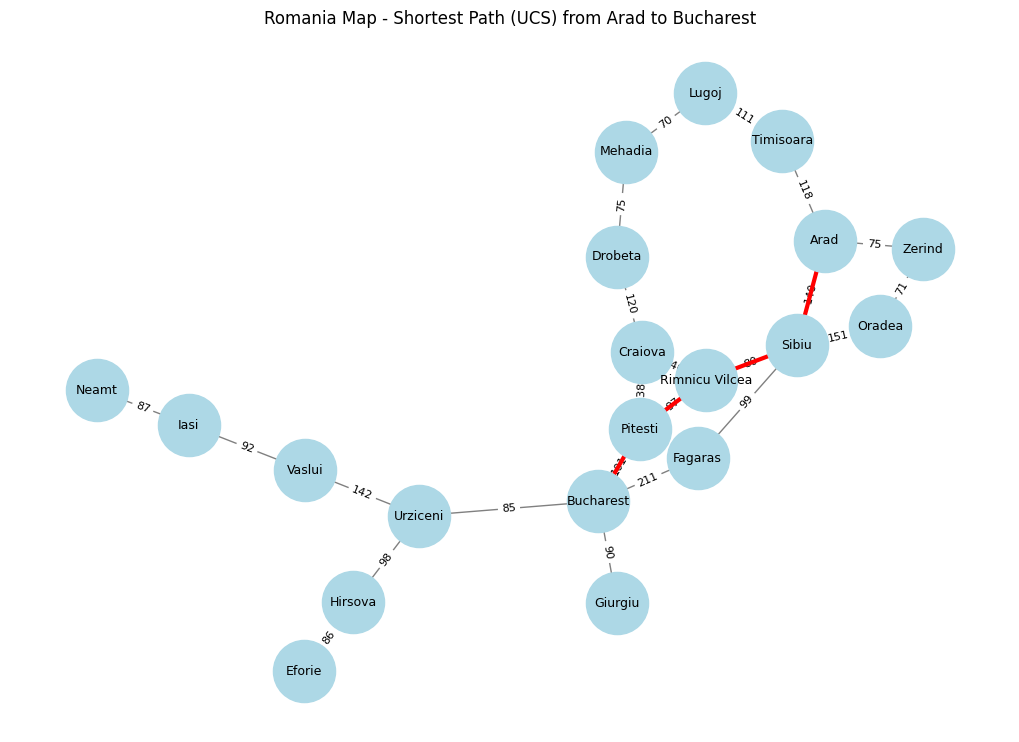

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Define the Romania map graph with weighted edges
romania_map = {
    'Arad': [('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Pitesti', 97), ('Craiova', 146)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
    'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
    'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101), ('Urziceni', 85), ('Giurgiu', 90)],
    'Giurgiu': [('Bucharest', 90)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Eforie': [('Hirsova', 86)],
    'Vaslui': [('Urziceni', 142), ('Iasi', 92)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Neamt': [('Iasi', 87)]
}

# UCS function to find the lowest-cost path
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "Arad"
goal_node = "Bucharest"

# Run UCS and get the shortest path
ucs_path, total_cost = uniform_cost_search(romania_map, start_node, goal_node)

# Create the graph using NetworkX
G = nx.Graph()

# Add edges with weights
for node, edges in romania_map.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

# Define node positions for better visualization
pos = nx.spring_layout(G)

# Draw the full graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=9)

# Draw edge labels (weights)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Highlight the UCS path
if ucs_path:
    path_edges = list(zip(ucs_path, ucs_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")

plt.title("Romania Map - Shortest Path (UCS) from Arad to Bucharest")
plt.show()
